In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataOriDf = pd.read_excel('../../data/데이터정리3.xlsx')

pd.set_option('display.max_row', 1200)
pd.set_option('display.max_columns', 100)

#1977년 합격자부터 2019년 합격자
dataDf = dataOriDf[['년도','의대졸합격/남', '의대졸합격/여', '의전졸합격/남', '의전졸합격/여', '불합합격/남', '불합합격/여']]
dataDf = dataDf[27:70]
dataDf

,년도,의대졸합격/남,의대졸합격/여,의전졸합격/남,의전졸합격/여,불합합격/남,불합합격/여
27,1977,931.596948,154.728905,0.000000,0.000000,94.073025,16.601122
28,1978,963.430634,153.841219,0.000000,0.000000,70.087343,11.640804
29,1979,952.823094,156.096965,0.000000,0.000000,94.922634,15.157307
30,1980,1029.855455,178.226546,0.000000,0.000000,97.882349,16.035650
31,1981,1025.916937,132.348475,0.000000,0.000000,148.956253,25.778335
32,1982,1219.989023,111.256861,0.000000,0.000000,59.126499,7.627617
33,1983,1186.936113,150.018157,0.000000,0.000000,60.526058,5.519672
34,1984,1031.755427,187.795948,0.000000,0.000000,294.257142,37.191483
35,1985,1241.891793,180.849974,0.000000,0.000000,138.964481,25.293752
36,1986,1655.578491,302.066769,0.000000,0.000000,93.708482,13.646259


In [6]:
npData = np.around(np.array(dataDf)[:,1:7])

In [13]:
# 분류모델함수 생성
# x - x값, sp - 시작점, xl - x축 조정, yl - y축 조정
def sigmoid_function(x, sp, xl, yl):
    
    result = 1 / ( yl+np.exp((x-(sp+(10/xl/2)))*xl) )
    
            
    return result

In [11]:
# 분류모델 확률질량함수 생성

def sigmoid_model(sp, xl, yl):
    x = np.arange(1, 101, 1)
    y = sigmoid_function(x, sp, xl, yl)
    sum = np.sum(y)
    z = y/sum
    
    return z

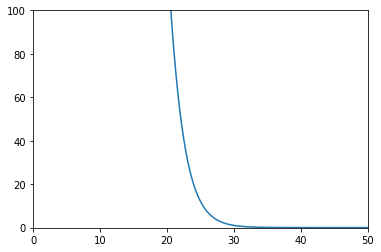

In [14]:
# 분배모델 시각화
x = np.arange(0, 100, 0.1)
y = sigmoid_function(x, 20, 0.5, 0.001)
plt.plot(x, y)
plt.ylim(-0.1, 100)
plt.xlim(0, 50)
plt.show()

In [7]:
def makeArrayUseModel(xlList, ylList):
    model1 = sigmoid_model(26,xlList[0],ylList[0]) # 의대 남
    model2 = sigmoid_model(26,xlList[1],ylList[1]) # 의대 여
    model3 = sigmoid_model(28,xlList[2],ylList[2]) # 의전원 남
    model4 = sigmoid_model(28,xlList[3],ylList[3]) # 의전원 여
    model5 = sigmoid_model(27,xlList[4],ylList[4]) # 재시험 남
    model6 = sigmoid_model(27,xlList[5],ylList[5]) # 재시험 여
    result = [model1, model2, model3, model4, model5, model6]
    
    return np.array(result)

In [9]:
def shiftOld(personArray):
    dataArray = np.zeros((2,len(personArray[0])))
    dataArray[0] = np.roll(personArray[0], 1)  
    dataArray[1] = np.roll(personArray[1], 1)
    dataArray[0][0] = 0
    dataArray[1][0] = 0
    return dataArray


In [22]:
xlList = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
ylList = [0.005, 0.005, 0.005, 0.005, 0.005, 0.005]

modelAry = makeArrayUseModel(xlList, ylList)

yearSize = len(npData)
oldSize = 100
modelSize = len(modelAry)

#모델 적용 배열
applyModelArray = np.zeros((yearSize,modelSize,oldSize))

#신규인원 배열
newPersonArray = np.zeros((yearSize,2,oldSize))

#누적인원 배열
personArray = np.zeros((yearSize,2,oldSize))

for i in range(yearSize):
    for j in range(modelSize):
        applyModelArray[i][j] = np.around(modelAry[j]*np.around(npData[i][j]))
        
        if j%2==0:
            newPersonArray[i][0] += applyModelArray[i][j]
        else:
            newPersonArray[i][1] += applyModelArray[i][j]



for i in range(yearSize):
    if i>0:
        personArray[i] = shiftOld(personArray[i-1]) + newPersonArray[i]
    else:
        personArray[i] =  newPersonArray[i]

In [11]:
len(modelAry)
yearSize

43

In [12]:
sum(newPersonArray[42])

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 570., 475., 696., 485., 326., 212., 134.,  84.,
        52.,  32.,  18.,  11.,   7.,   3.,   3.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.])

In [13]:
pd.DataFrame(personArray[18])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,1323.0,1743.0,1927.0,2101.0,2140.0,2249.0,2284.0,2317.0,2127.0,1864.0,1626.0,1561.0,1459.0,1333.0,1273.0,1193.0,1148.0,1093.0,771.0,506.0,325.0,201.0,126.0,79.0,48.0,28.0,16.0,9.0,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,113.0,299.0,420.0,477.0,518.0,530.0,550.0,512.0,453.0,402.0,330.0,290.0,250.0,204.0,179.0,186.0,178.0,175.0,173.0,122.0,81.0,52.0,32.0,19.0,11.0,7.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
